## Version 1

In [ ]:
%%sh
curl https://packages.microsoft.com/keys/microsoft.asc | apt-key add -
curl https://packages.microsoft.com/config/ubuntu/16.04/prod.list > /etc/apt/sources.list.d/mssql-release.list
sudo apt-get update
sudo ACCEPT_EULA=Y apt-get -q -y install msodbcsql17
sudo apt-get install unixodbc-dev
pip install pyodbc
pip install chart_studio

OK
Get:1 https://packages.microsoft.com/ubuntu/16.04/prod xenial InRelease [4,002 B]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:4 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ Packages [62.9 kB]
Get:5 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:6 https://packages.microsoft.com/ubuntu/16.04/prod xenial/main amd64 Packages [240 kB]
Ign:7 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:8 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [697 B]
Hit:9 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:10 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Get:11 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0Warning: apt-key output should not be parsed (stdout is not a terminal)
100   983  100   983    0     0   4427      0 --:--:-- --:--:-- --:--:--  4427
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100    79  100    79    0     0    868      0 --:--:-- --:--:-- --:--:--   868
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 6.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling

In [ ]:
!pip install pyemma

     |████████████████████████████████| 1.6 MB 4.0 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Using cached deeptime-0.2.9-cp37-cp37m-linux_x86_64.whl
     |████████████████████████████████| 81 kB 7.2 MB/s 
     |████████████████████████████████| 603 kB 37.7 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Using cached mdtraj-1.9.6-cp37-cp37m-manylinux_2_5_x86_64.manylinux1_x86_64.whl (6.2 MB)
     |████████████████████████████████| 318 kB 52.1 MB/s 
  Using cached threadpoolctl-2.2.0-py3-none-any.whl (12 kB)
     |████████████████████████████████| 65 kB 3.0 MB/s 
  Created wheel for pyemma: filename=pyEMMA-2.5.9-cp37-cp37m-linux_x86_64.whl size=2498751 sha256=b10db5521ebc8a8bf99df4e3abe77354b16cc5eb36f47e661de0398e08af777b
  Stored in directory: /root/.cache/pip/wheels/6a/30/8f/13aef118741687585d497f8b57e2c5e0be6

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.dates as md
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import host_subplot
import mpl_toolkits.axisartist as AA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.covariance import EllipticEnvelope
from pyemma import msm
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from mpl_toolkits.mplot3d import Axes3D
from pyemma import msm
%matplotlib inline

In [ ]:
import pyodbc 
server = '13.211.197.103' 
database = 'temp_PMEData_subset' 
username = 'SA' 
password = '@#DT@LP911' 
cnxn = pyodbc.connect('DRIVER={ODBC Driver 17 for SQL Server};SERVER='+server+';DATABASE='+database+';UID='+username+';PWD='+ password)
cursor = cnxn.cursor()

In [ ]:
sql_powermeter = "select * from dbo.Query where SourceName = 'WP_SF_MVPS4.PM1'"
df_power = pd.read_sql(sql_powermeter, cnxn)

sql_weatherstation = "select * from dbo.Query where SourceName = 'WP_SF_MVPS4.WS1'"
df_weather = pd.read_sql(sql_weatherstation, cnxn)

In [ ]:
rslt_power = df_power[df_power['MeasurementName'] == 'Active Power']
df_final_activepower = rslt_power.resample('d', on='TimestampUTC').mean().dropna(how='all')
df_final_activepower.rename(columns={'Value':'activepower'}, inplace=True)

rslt_irradiance = df_weather[df_weather['MeasurementName'] == 'Irradiance Global (W/m^2)']
df_final_irradiance = rslt_irradiance.resample('d', on='TimestampUTC').mean().dropna(how='all')
df_final_irradiance.rename(columns={'Value':'irradiance'}, inplace=True)

rslt_rainfall = df_weather[df_weather['MeasurementName'] == 'Rainfall (mm)']
df_final_rainfall = rslt_rainfall.resample('d', on='TimestampUTC').mean().dropna(how='all')
df_final_rainfall.rename(columns={'Value':'rainfall'}, inplace=True)

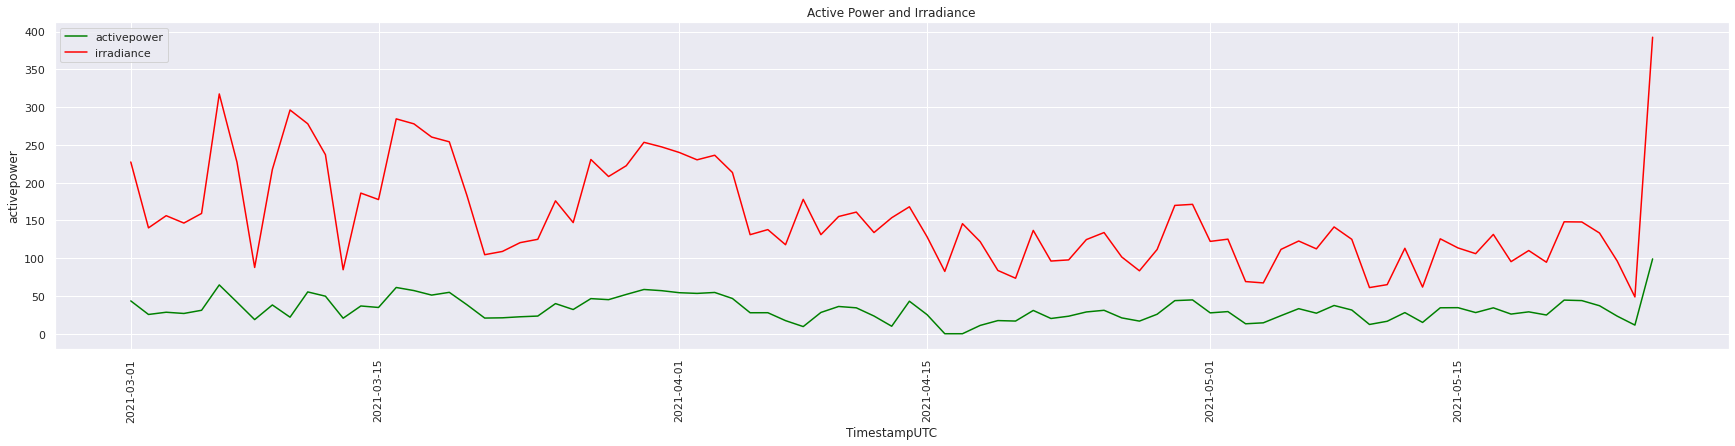

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
sns.set(rc={'figure.figsize':(30,6)})

sns.lineplot(x="TimestampUTC", y="activepower", data=df_final_activepower, label="activepower", color = "green")
sns.lineplot(x="TimestampUTC", y="irradiance", data=df_final_irradiance, label="irradiance", color = "red")
plt.xticks(rotation=90)
plt.title('Active Power and Irradiance')
plt.show()

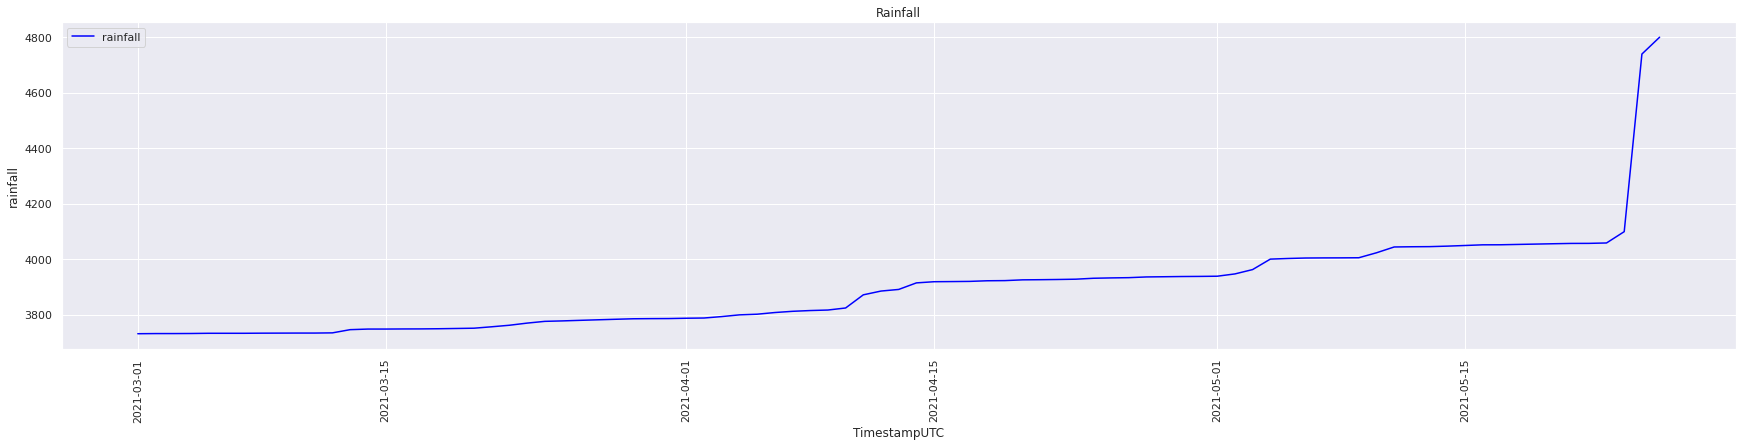

In [ ]:
sns.set_theme(style="darkgrid")
sns.set(rc={'figure.figsize':(30,6)})

sns.lineplot(x="TimestampUTC", y="rainfall", data=df_final_rainfall, label="rainfall", color = "blue")
plt.xticks(rotation=90)
plt.title('Rainfall')
plt.show()

In [ ]:
df_timestamp = pd.DataFrame(data=rslt_power['TimestampUTC'].dt.date.unique())
df_timestamp.rename(columns={0:'date'}, inplace=True)
df_timestamp.head()

,date
0,2021-03-01
1,2021-03-02
2,2021-03-03
3,2021-03-04
4,2021-03-05


In [ ]:
df_timestamp.reset_index(drop=True, inplace=True)
df_final_activepower.reset_index(drop=True, inplace=True)
df_final_irradiance.reset_index(drop=True, inplace=True)
df_final_rainfall.reset_index(drop=True, inplace=True)

final_data = pd.concat([df_timestamp,df_final_activepower,df_final_irradiance,df_final_rainfall],join='outer', axis=1)
final_data.head()

,date,activepower,irradiance,rainfall
0,2021-03-01,43.436184,227.419355,3730.825806
1,2021-03-02,25.492922,140.189474,3731.372043
2,2021-03-03,28.450577,156.315789,3731.400000
3,2021-03-04,26.823645,146.542553,3731.645652
4,2021-03-05,31.050348,159.294737,3732.400000


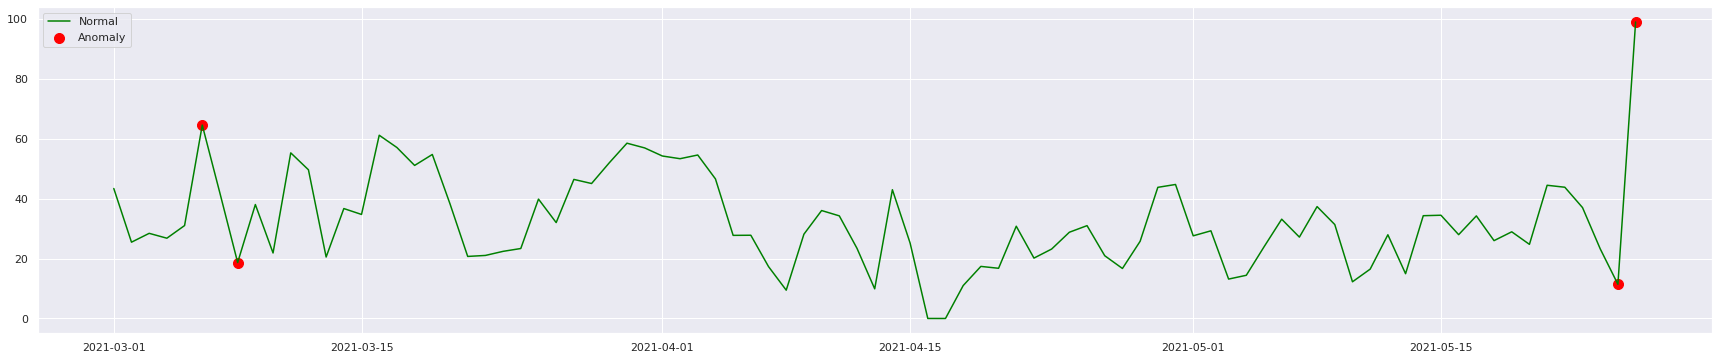

In [ ]:
data = final_data[['activepower', 'irradiance', 'rainfall']]
scaler = StandardScaler()
np_scaled = scaler.fit_transform(data)
data = pd.DataFrame(np_scaled)
# train oneclassSVM
outliers_threshold = 0.05
model = OneClassSVM(nu=outliers_threshold, kernel="rbf", gamma=0.01)
model.fit(data)
 
final_data['anomaly1'] = pd.Series(model.predict(data))
# df['anomaly3'] = df['anomaly3'].map( {1: 0, -1: 1} )
fig, ax = plt.subplots(figsize=(30,6))

a = final_data.loc[final_data['anomaly1'] == -1, ['date', 'activepower']] #anomaly

ax.plot(final_data['date'], final_data['activepower'], color='green', label ='Normal')
ax.scatter(a['date'],a['activepower'], color='red', label = 'Anomaly', s = 100)
plt.legend()
plt.show();

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


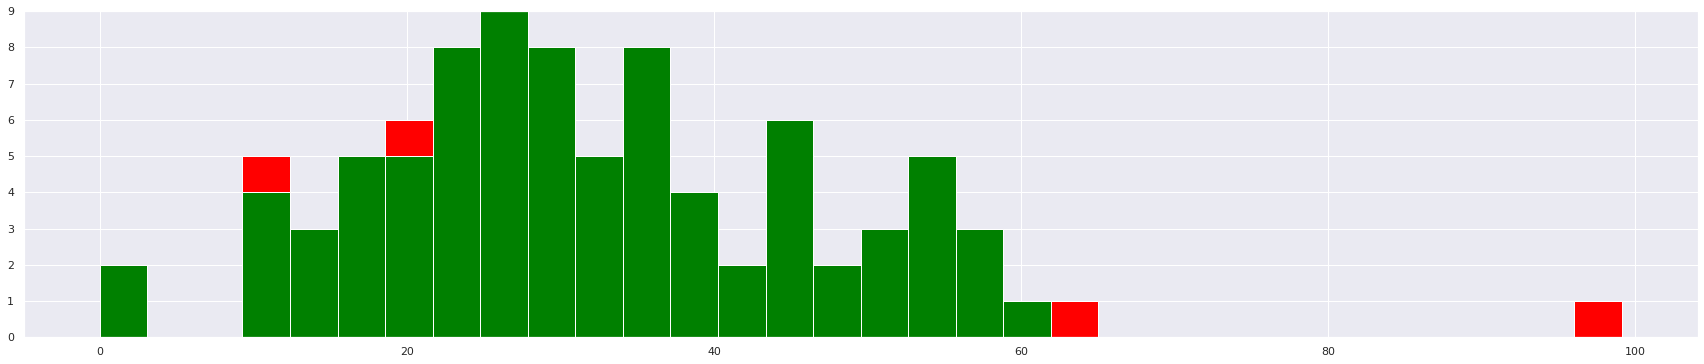

In [ ]:
# visualisation of anomaly with avg price repartition
a = final_data.loc[final_data['anomaly1'] == 1, 'activepower']
b = final_data.loc[final_data['anomaly1'] == -1, 'activepower']

fig, axs = plt.subplots(figsize=(30,6))
axs.hist([a,b], bins=32, stacked=True, color=['green', 'red'])
plt.show();

## Version 2 of OSVM 

In [1]:
import requests
import requests
import pandas as pd
import datetime
from json import JSONEncoder
import numpy as np
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.preprocessing import  StandardScaler
import matplotlib.pyplot as plt
from timeit import default_timer as  dt
import pickle

In [2]:
class DateTimeEncoder(JSONEncoder):
        #Override the default method
        def default(self, obj):
            if isinstance(obj, (datetime.date, datetime.datetime)):
                return obj.isoformat()

def bring_weather_data(build_model):
    weather_data = []
    #for each in ['Ambient Temperature Celsius' ,'AVG in-plane irradiance' ,'Back-of-Module Temperature (deg C)','Irradiance Plane-of-Array (W/m^2)']:
    for each in ['Ambient Temperature Celsius','Irradiance Global (W/m^2)','Weather Atmospheric Pressure']:
        weather_data.append(get_data('WP_SF_MVPS4.WS1' ,each,build_model ))
    pd.concat(weather_data,axis =1 )
    return pd.concat(weather_data,axis =1 )

def resample_to_hour( df ):
  temp = df.reset_index()
  temp['measurementtimestamp']  = pd.to_datetime(temp['measurementtimestamp'],utc=True)
  temp = temp.resample('60T', on='measurementtimestamp').mean().dropna(how='any')
  return temp 


def predict(df):
    temp = df
    print(len(temp))
    scaler = StandardScaler()
    np_scaled = scaler.fit_transform(df)
    data = pd.DataFrame(np_scaled)
    loaded_model = pickle.load(open('Anamoly_One_class_SVM.sav', 'rb'))
    temp['Label'] = list(pd.Series(loaded_model.predict(data)))
    temp['Label'] = temp['Label'].map( { -1 : 'A' , 1 : 'N' }  )
    return temp

def get_data(id,attri,build_model):
    ''' 
    Edit this if your running a cron Job 
    queryTimeDiff = datetime.timedelta(minutes=90)
    endDate = datetime.datetime.now()
    startDate = datetime.datetime.now() - queryTimeDiff
    '''
    #query = {'id':id,'attributes':attri,'startDate':'2021-03-01 00:00:00','endDate':'2021-03-05 23:59:59'}
    #query = {'id':id,'attributes':attri,'startDate':startDate,'endDate':endDate}
    #query = {'id':id,'attributes':attri,'startDate':'2021-09-15 00:00:00','endDate':'2021-09-19 23:59:59'}
    startDate = ''
    endDate = ''
    if build_model:
      queryTimeDiff = datetime.timedelta(days=120)
      startDate = datetime.datetime.now() - queryTimeDiff
      endDate = datetime.datetime.now()
      

      # startDate = '2021-07-01 23:59:59'
      # endDate = '2021-10-30 00:00:00'
      print( '='*50 , '\n' , 'Start Date = ' , startDate , 'End Date = ' , endDate , '\n'  , '='*50 )
    else:
      queryTimeDiff = datetime.timedelta(days=120)
      startDate = datetime.datetime.now() - queryTimeDiff
      endDate = datetime.datetime.now()
      # startDate = '2021-07-01 23:59:59'
      # endDate = '2021-10-30 00:00:00'

    print(f'{id} , {attri}')
    query = {'id':id,'attributes':attri,'startDate':startDate,'endDate':endDate}
    query = DateTimeEncoder().encode(query)
    query = eval(query)
    response = requests.get('http://54.206.42.58:8006/api/historicalData/getObjectAttributeHistoricalData', params=query)

    data = response.json()
    exportedData = data["data"]["ObjectData"][id][attri]["timeSeriesData"]
    #display(exportedData)
    required_data = pd.DataFrame(exportedData, columns=["measurementtimestamp", "value"])
    required_data.set_index('measurementtimestamp', inplace = True)
    required_data["value"] = required_data["value"].astype('float')
    #required_data.columns = [id + '_' + 'AP']
    return required_data



'''
This function is to be called every monday on a weekly basis using 2 months prior data
'''
def make_model( df ):
    temp = df
    print(len(temp))
    scaler = StandardScaler()
    np_scaled = scaler.fit_transform(df)
    data = pd.DataFrame(np_scaled)
    outliers_threshold = 0.02
    model = OneClassSVM(nu=outliers_threshold, kernel="rbf", gamma=0.01)
    model.fit(data)
    filename = 'Anamoly_One_class_SVM.sav'
    pickle.dump(model, open(filename, 'wb'))
    print('Model_saved')
    

def osvm_prediction( objectId,attributeId,build_model ):
    variable_of_intererst = get_data(objectId,attributeId,build_model)
    main_df = bring_weather_data(build_model)
    main_df[attributeId] =variable_of_intererst
    #print(main_df)
    #main_df.columns = ['Ambient Temperature Celsius' ,'AVG in-plane irradiance' ,'Back-of-Module Temperature (deg C)','Irradiance Plane-of-Array (W/m^2)' , attributeId]
    main_df.columns =  ['Ambient Temperature Celsius','Irradiance Global (W/m^2)','Weather Atmospheric Pressure',attributeId]

    print( '='*50 , '\n' ,  main_df.isna().sum())
    print( '='*50 , '\n' ,  main_df.shape)
    temp = main_df.copy( deep=True )
    hourly_df = resample_to_hour(main_df)
    if build_model:
       make_model( hourly_df )
    else:
      Anamoly_df =  predict(hourly_df)
      results =  Anamoly_df.reset_index().to_dict(orient = 'records')
      return Anamoly_df
      finalData = []
      counter = 0
      for data in results:
          tempData = {
          "objectid": objectId,
          "attributeserviceid":"OSVM_"+attributeId,
          "measurementtimestamp": data['measurementtimestamp'],
          "value" : data[attributeId],
          "customData": {
          "Label": data['Label'],
          "Ambient Temperature Celsius": data['Ambient Temperature Celsius'],
          "AVG in-plane irradiance": data['AVG in-plane irradiance'],
          "Back-of-Module Temperature (deg C)": data['Back-of-Module Temperature (deg C)'],
          "Irradiance Plane-of-Array (W/m^2)": data['Irradiance Plane-of-Array (W/m^2)'],
          }
          }
          finalData.append(tempData)
      return finalData 

In [ ]:
get_data('WP_SF_MVPS1.INV1','Active Power',True)

In [3]:
osvm_prediction('WP_SF_MVPS1.INV1','Active Power',True)
results = osvm_prediction('WP_SF_MVPS1.INV1','Active Power',False)

 Start Date =  2021-11-21 02:45:05.220173 End Date =  2022-03-21 02:45:05.220181 
WP_SF_MVPS1.INV1 , Active Power
 Start Date =  2021-11-21 02:45:12.517386 End Date =  2022-03-21 02:45:12.517398 
WP_SF_MVPS4.WS1 , Ambient Temperature Celsius
 Start Date =  2021-11-21 02:45:13.765895 End Date =  2022-03-21 02:45:13.765908 
WP_SF_MVPS4.WS1 , Irradiance Global (W/m^2)
 Start Date =  2021-11-21 02:45:16.279226 End Date =  2022-03-21 02:45:16.279241 
WP_SF_MVPS4.WS1 , Weather Atmospheric Pressure
 Ambient Temperature Celsius     1180
Irradiance Global (W/m^2)        495
Weather Atmospheric Pressure    1180
Active Power                     129
dtype: int64
 (20849, 4)
1752
Model_saved
WP_SF_MVPS1.INV1 , Active Power
WP_SF_MVPS4.WS1 , Ambient Temperature Celsius
WP_SF_MVPS4.WS1 , Irradiance Global (W/m^2)
WP_SF_MVPS4.WS1 , Weather Atmospheric Pressure
 Ambient Temperature Celsius     1180
Irradiance Global (W/m^2)        495
Weather Atmospheric Pressure    1180
Active Power                   

In [4]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.graph_objects as go


time_col = pd.to_datetime(results.index , utc = 'True')
results.index = time_col.tz_convert(  'Australia/Melbourne'  )

re = results[results.Label ==  'A']

fig = make_subplots(rows=4, cols=1  , subplot_titles=("Active Power", 'Weather Atmospheric Pressure' ,'Irradiance Global (W/m^2)', 'Ambient Temperature Celsius') )

fig.append_trace(go.Scatter(x = results.index, y = results['Active Power'],mode='lines',showlegend=False), row=1, col=1)
fig.append_trace(go.Scatter(x=re.index, y=re['Active Power'],mode='markers', marker =  dict( color='red' ),showlegend=False ), row=1, col=1)


fig.append_trace(go.Scatter(x = results.index, y = results['Weather Atmospheric Pressure'],mode='lines',showlegend=False), row=2, col=1)
fig.append_trace(go.Scatter(x= re.index, y=re['Weather Atmospheric Pressure'],mode='markers',marker =  dict( color='red' ),showlegend=False), row=2, col=1)

fig.append_trace(go.Scatter(x = results.index, y = results['Irradiance Global (W/m^2)'],mode='lines',showlegend=False), row=3, col=1)
fig.append_trace(go.Scatter(x =  re.index, y=re['Irradiance Global (W/m^2)'],mode='markers',marker =  dict( color='red' ),showlegend=False), row=3, col=1)

fig.append_trace(go.Scatter(x = results.index, y = results['Ambient Temperature Celsius'],mode='lines',showlegend=False), row=4, col=1)
fig.append_trace(go.Scatter(x = re.index, y=re['Ambient Temperature Celsius'],mode='markers',marker =  dict( color='red' ),showlegend=False), row=4, col=1)


fig.update_layout(height=800, width=1000, title_text="Stacked Subplots")
fig.show()







In [41]:
from itertools import combinations
from plotly.subplots import make_subplots
import plotly.express as px


re = results[results.Label ==  'A']
comb = list(combinations(['Ambient Temperature Celsius', 'Irradiance Global (W/m^2)',
       'Weather Atmospheric Pressure', 'Active Power'], 2))

fig = make_subplots(rows=3, cols=2)


combo_number = 0

for each_row in [1,2,3]: 
  for each_col in [1,2]:   
     fig.append_trace(go.Scatter(x = results[comb[combo_number][0]], y = results[comb[combo_number][1]],mode='markers' , name= f'{comb[combo_number][0]} vs  {comb[combo_number][1]}' ), row=each_row, col=each_col)
     fig.append_trace(go.Scatter(x= re[comb[combo_number][0]], y=re[comb[combo_number][1]],mode='markers',marker =  dict( color='red' ),showlegend=False , text = re.index ), row=each_row, col=each_col)
     combo_number = combo_number + 1
fig.show()


comb[10][01] 

## Extra Visualisations. 

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.graph_objects as go

re = results[results.Label ==  'A']

 ['Ambient Temperature Celsius','Irradiance Global (W/m^2)','Weather Atmospheric Pressure'

fig = make_subplots(rows=5, cols=1  , subplot_titles=("Active Power", "AVG in-plane irradiance", "Irradiance Plane-of-Array (W/m^2)", "Back-of-Module Temperature (deg C)","Ambient Temperature Celsius") )

fig.append_trace(go.Scatter(x = results.index, y = results['Active Power'],mode='lines',showlegend=False), row=1, col=1)
fig.append_trace(go.Scatter(x=re.index, y=re['Active Power'],mode='markers', marker =  dict( color='red' ),showlegend=False ), row=1, col=1)

fig.append_trace(go.Scatter(x = results.index, y = results['AVG in-plane irradiance'],mode='lines',showlegend=False), row=2, col=1)
fig.append_trace(go.Scatter(x =  re.index, y=re['AVG in-plane irradiance'],mode='markers',marker =  dict( color='red' ),showlegend=False), row=2, col=1)

fig.append_trace(go.Scatter(x = results.index, y = results['Ambient Temperature Celsius'],mode='lines',showlegend=False), row=5, col=1)
fig.append_trace(go.Scatter(x = re.index, y=re['Ambient Temperature Celsius'],mode='markers',marker =  dict( color='red' ),showlegend=False), row=5, col=1)

fig.append_trace(go.Scatter(x = results.index, y = results['Back-of-Module Temperature (deg C)'],mode='lines',showlegend=False), row=4, col=1)
fig.append_trace(go.Scatter(x= re.index, y=re['Back-of-Module Temperature (deg C)'],mode='markers',marker =  dict( color='red' ),showlegend=False), row=4, col=1)

fig.append_trace(go.Scatter(x = results.index, y = results['Irradiance Plane-of-Array (W/m^2)'],mode='lines',showlegend=False), row=3, col=1)
fig.append_trace(go.Scatter(x= re.index, y=re['Irradiance Plane-of-Array (W/m^2)'],mode='markers',marker =  dict( color='red' ),showlegend=False), row=3, col=1)
fig.update_layout(height=800, width=1000, title_text="Stacked Subplots")
fig.show()




In [ ]:
import plotly.express as px
def get_data_visualise( id , attri ):
    to_analyse  = get_data(id,attri,True)
    to_analyse = to_analyse.sort_index()
    time_col = pd.to_datetime(to_analyse.index , utc = 'True')
    to_analyse.index = time_col.tz_convert(  'Australia/Melbourne'  )
    to_analyse.index = time_col
    fig = px.line(to_analyse, x=to_analyse.index, y="value")
    fig.show()

get_data_visualise('WP_SF_MVPS1.INV1','Active Power')

 Start Date =  2021-12-17 02:02:44.844717 End Date =  2022-03-17 02:02:44.844724 
WP_SF_MVPS1.INV1 , Active Power


In [ ]:
'''
for each in ['Ambient Temperature Celsius' ,'AVG in-plane irradiance' ,'Back-of-Module Temperature (deg C)','Irradiance Plane-of-Array (W/m^2)']:
        weather_data.append(get_data('WP_SF_MVPS4.WS1' ,each,build_model ))
'''

get_data_visualise('WP_SF_MVPS4.WS1','AVG in-plane irradiance')


 Start Date =  2022-01-15 00:08:57.823221 End Date =  2022-03-16 00:08:57.823210 
WP_SF_MVPS4.WS1 , AVG in-plane irradiance
